The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


**We will apply the shallow neural network to the MNIST dataset as a concrete example to go through the pipelines of supervised learning algorithm.**

Problem: Build an algorithm to identify the digit label from the handwritten image using the MNIST dataset. 

In [1]:
!pip install tensorflow

In [2]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Import MNIST dataset
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()

# Reshape input image data from matrixs to vectors
[n_samples_train, width, height] = np.shape(x_mnist_train)
[n_samples_test, width, height] = np.shape(x_mnist_test)
x_train = x_mnist_train.reshape([n_samples_train, width*height]).astype('float32')
x_test = x_mnist_test.reshape([n_samples_test, width*height]).astype('float32')

# Normalize the dataset
x_train /= 255
x_test /= 255

# Convert class vectors to one-hot vector matrices
num_classes = 10    
y_train = to_categorical(y_mnist_train, num_classes)
y_test = to_categorical(y_mnist_test, num_classes)

## **Implement ANN for Digit Classification**

In [3]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# In the MINST data, the input dim = 784 and the output dim = 10 
def shallow_NN_model(n_hidden_neurons, output_dim = 10, input_dim = 784):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # Add a hidden layer with ReLU activation function
    model.add(Dense(n_hidden_neurons, activation='relu', input_dim = input_dim))
    # Add an output layer with softmax activation function for multi-classification problem
    model.add(Dense(output_dim, activation = 'softmax'))
    sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
    
epochs = 100
batch  = 256
n_hidden_neurons = 50
model = shallow_NN_model(n_hidden_neurons)
hist_ANN = model.fit(x_train, y_train, epochs=epochs, batch_size=batch, validation_data=(x_test, y_test), verbose=2)

Compiling Model ... 
Model compield in 0.09202885627746582 seconds
Epoch 1/100
235/235 - 1s - loss: 0.3482 - accuracy: 0.8985 - val_loss: 0.1958 - val_accuracy: 0.9429 - 910ms/epoch - 4ms/step
Epoch 2/100
235/235 - 0s - loss: 0.1703 - accuracy: 0.9510 - val_loss: 0.1431 - val_accuracy: 0.9579 - 477ms/epoch - 2ms/step
Epoch 3/100
235/235 - 0s - loss: 0.1279 - accuracy: 0.9624 - val_loss: 0.1267 - val_accuracy: 0.9612 - 497ms/epoch - 2ms/step
Epoch 4/100
235/235 - 0s - loss: 0.1075 - accuracy: 0.9679 - val_loss: 0.1184 - val_accuracy: 0.9632 - 500ms/epoch - 2ms/step
Epoch 5/100
235/235 - 0s - loss: 0.0934 - accuracy: 0.9723 - val_loss: 0.1170 - val_accuracy: 0.9621 - 492ms/epoch - 2ms/step
Epoch 6/100
235/235 - 0s - loss: 0.0834 - accuracy: 0.9748 - val_loss: 0.1060 - val_accuracy: 0.9664 - 491ms/epoch - 2ms/step
Epoch 7/100
235/235 - 1s - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.1090 - val_accuracy: 0.9662 - 513ms/epoch - 2ms/step
Epoch 8/100
235/235 - 0s - loss: 0.0687 - accuracy:

## **Plot the Fitting Result**

In [4]:
import matplotlib.pyplot as plt

# Define functions to plot the loss and accuracy
def plot_hist_var(hist, str_var):
  plt.figure()
  plt.plot(hist.history[str_var], 'b', linewidth=1.5)
  plt.plot(hist.history['val_'+str_var], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel(str_var[0].upper()+str_var[1:])

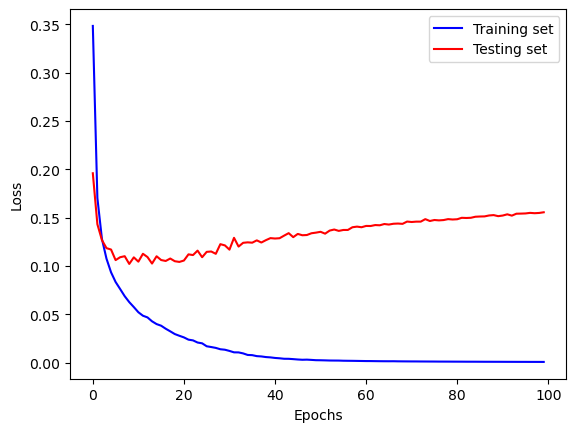

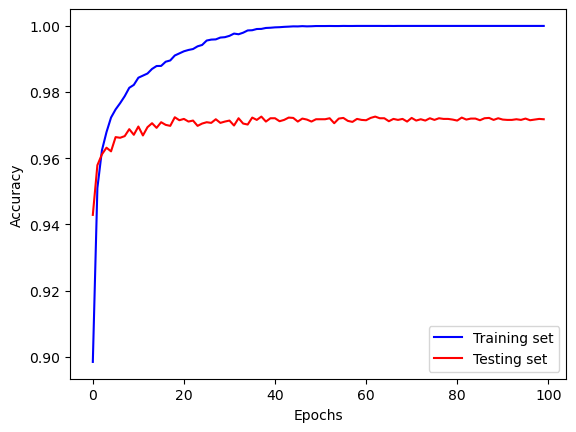

In [5]:
plot_hist_var(hist_ANN, 'loss')
plot_hist_var(hist_ANN, 'accuracy')

## **Assess the performance of a fitted model**



There are various measurements of the performance of the fitted models in classification problems.
*   Loss function and the accuracy;
*   Confusion matrix. 

In [6]:
score =  model.evaluate(x_test, y_test)
print(model.metrics_names)
print('Test ' + model.metrics_names[0] , score[0])
print('Test '+ model.metrics_names[1] , score[1])

313/313 [==============================] - 0s 891us/step - loss: 0.1555 - accuracy: 0.9718
['loss', 'accuracy']
Test loss 0.15548944473266602
Test accuracy 0.9718000292778015


In [7]:
from sklearn.metrics import confusion_matrix

Y_test_prob_pred = model.predict(x_test)
Y_test_class_pred = np.argmax(model.predict(x_test), axis=-1)

print(Y_test_class_pred)
cm = confusion_matrix( y_mnist_test, Y_test_class_pred )
labels = np.arange(10)

313/313 [==============================] - 0s 779us/step
[7 2 1 ... 4 5 6]


Confusion matrix, without normalization
[[ 962    0    0    1    2    4    5    1    3    2]
 [   0 1123    1    4    0    1    2    1    3    0]
 [   6    3  996    6    4    0    3    6    8    0]
 [   0    1    5  987    0    4    0    5    3    5]
 [   1    1    2    0  957    0    3    3    2   13]
 [   3    1    0    9    4  861    5    1    5    3]
 [   6    4    4    0    4    3  933    0    4    0]
 [   1    4    7    4    2    0    0  999    2    9]
 [   3    1    5    6    4    7    6    2  937    3]
 [   3    3    1    7   15    4    0    6    7  963]]
Normalized confusion matrix
[[9.81632653e-01 0.00000000e+00 0.00000000e+00 1.02040816e-03
  2.04081633e-03 4.08163265e-03 5.10204082e-03 1.02040816e-03
  3.06122449e-03 2.04081633e-03]
 [0.00000000e+00 9.89427313e-01 8.81057269e-04 3.52422907e-03
  0.00000000e+00 8.81057269e-04 1.76211454e-03 8.81057269e-04
  2.64317181e-03 0.00000000e+00]
 [5.81395349e-03 2.90697674e-03 9.65116279e-01 5.81395349e-03
  3.87596899e-03 0.000000

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25348\4080522767.py:35: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = 0)


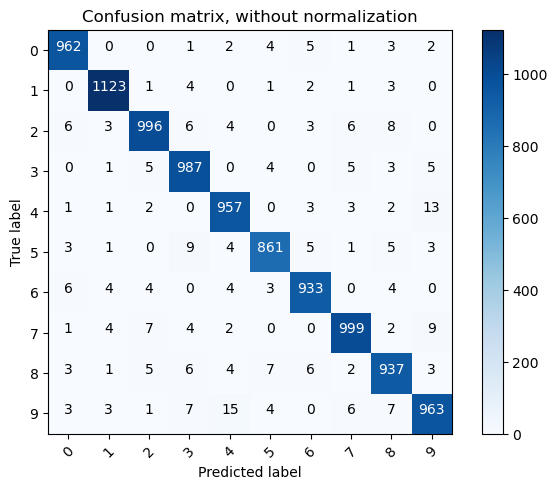

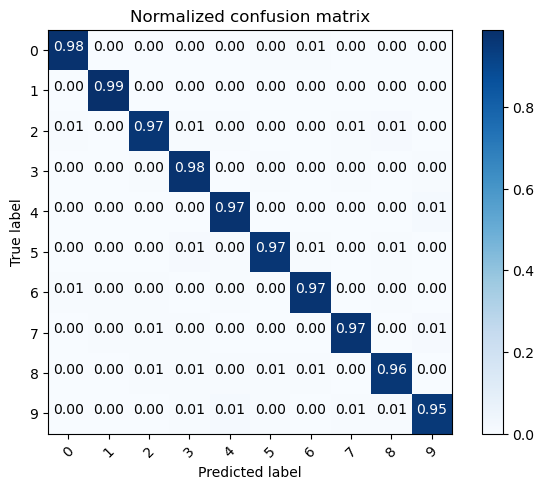

In [8]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), normalize=True, title='Normalized confusion matrix')
